In [1]:
import os
from shutil import rmtree
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
IPythonConsole.drawOptions.addAtomIndices=True
from rdkit.Chem.Draw.IPythonConsole import drawMol3D
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets

from serenityff.torsion.tree.dash_tree import DASHTorsionTree
#from serenityff.charge.tree.atom_features import AtomFeatures
from serenityff.charge.tree.atom_features_reduced import AtomFeaturesReduced as AtomFeatures
from serenityff.torsion.tree_develop.tree_constructor import Torsion_tree_constructor

In [2]:
#data_file="../data/example_extraction.csv"
data_file="../data/large_example.csv"
#sdf_suply="../data/example.sdf" 
sdf_suply="../data/large_example.sdf"
data_split = 0
out_folder = "./example_tree_out"
if os.path.exists(out_folder):
    rmtree(out_folder)
os.mkdir(out_folder)

In [3]:
mol_supplier = Chem.SDMolSupplier(sdf_suply, removeHs=False)
#df_test = pd.read_csv(data_file)

In [4]:
#df_test.groupby("mol_index").groups

In [5]:
tree_constructor = Torsion_tree_constructor(df_path=data_file,
                sdf_suplier=sdf_suply,
                num_layers_to_build=16,
                data_split=data_split,
                verbose=True,
                sanitize=False,
                sanitize_charges=True)

2024-01-22 09:08:41.191981	Initializing Tree_constructor
2024-01-22 09:08:41.192986	Mols imported, starting df import
2024-01-22 09:08:46.762088	df imported, starting data spliting
2024-01-22 09:08:46.772551	Splitting data
2024-01-22 09:08:46.869988	Data split, delete original
2024-01-22 09:09:33.042571	Starting table filling


100%|██████████| 1410563/1410563 [04:39<00:00, 5051.03it/s]


2024-01-22 09:14:12.934551	Table filled, starting adjacency matrix creation
Creating Adjacency matrices:


100%|██████████| 50000/50000 [00:10<00:00, 4823.96it/s]


Number of train mols: 50000
Number of test mols: 0
2024-01-22 09:14:23.870784	Charge constructor build, creating torsion df
2024-01-22 09:14:24.125658	0/50000 molecules processed
2024-01-22 09:19:25.264524	10000/50000 molecules processed
2024-01-22 09:43:39.339069	20000/50000 molecules processed
2024-01-22 10:36:01.348774	30000/50000 molecules processed
2024-01-22 11:56:51.903664	40000/50000 molecules processed


In [ ]:
tree_constructor.df

,atomtype,idx_in_mol,mol_index,node_attentions,truth,h_connectivity,connected_atoms,total_connected_attention,atom_feature
92,C,0,17,"[0.05644359067087934, 0.060629636709162715, 0....",0.002726,-1,"[0, 1, 2, 3]",0.012676,54181819
100,C,0,18,"[0.0445287382155489, 0.04440247451345873, 0.04...",0.000915,-1,"[0, 1, 2, 3]",0.011518,54181819
108,C,0,19,"[0.033775781647200846, 0.03424387531977831, 0....",-0.000515,-1,"[0, 1, 2, 3]",0.013637,54181819
278,C,0,41,"[0.05559352610899962, 0.03428071708137512, 0.1...",-0.003523,-1,"[0, 1, 2, 3]",0.096859,19184512
287,C,0,42,"[0.0400789684491619, 0.03064567868564406, 0.15...",-0.001546,-1,"[0, 1, 2, 3]",0.029138,19184512
...,...,...,...,...,...,...,...,...,...
216342,C,2,9999,"[0.03452378453206065, 0.03463236438754764, 0.0...",-0.000265,-1,"[9, 8, 7, 6]",0.012391,18181817
216341,C,3,9999,"[0.03330958187423627, 0.03381776376463526, 0.0...",0.000091,-1,"[8, 7, 6, 5]",0.013583,18181818
216340,C,4,9999,"[0.029016505228254778, 0.2295060069571202, 0.0...",0.000253,-1,"[7, 6, 5, 4]",0.012511,18181817
216339,C,5,9999,"[0.03328701291028745, 0.2344116697196689, 0.03...",-0.000421,-1,"[6, 5, 4, 9]",0.012957,18181717


In [ ]:
tree_constructor.create_tree_level_0()

Preparing Dataframe:
Number of unique atom features in df: 2106
Creating Tree Level 0:


100%|██████████| 2106/2106 [00:00<00:00, 10189.62it/s]

2024-01-22 08:53:05.639594	Layer 0 done


In [ ]:
tree_constructor.build_tree(num_processes=1)

AF=54181819 - Layer 1 done
children layer 1: []
AF 54181819 done
AF=19184512 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=3, fp=33, 3, 4]
AF 19184512 done
AF=18451818 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=6, fp=54, 0, 4, node --- lvl: 2, Num=2, fp=39, 0, 4, node --- lvl: 2, Num=3, fp=18, 3, 4, node --- lvl: 2, Num=3, fp=18, 0, 4, node --- lvl: 2, Num=6, fp=17, 0, 4]
AF 18451818 done
AF=39184518 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=2, fp=18, 0, 4, node --- lvl: 2, Num=179, fp=17, 0, 4]
AF 39184518 done
AF=45183918 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=2, fp=18, 0, 4, node --- lvl: 2, Num=12, fp=17, 0, 4]
AF 45183918 done
AF=18391818 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=15, fp=39, 0, 4, node --- lvl: 2, Num=21, fp=44, 0, 4, node --- lvl: 2, Num=2, fp=45, 0, 4, node --- lvl: 2, Num=225, fp=17, 0, 4, node --- lvl: 2, Num=146, fp=18, 0, 4]
AF 18391818 done
AF=45181839 - Layer 1 done
children layer 1: [node --- l

In [ ]:
print(tree_constructor.root.children[26])
print(tree_constructor.root.children[26].children)

node --- lvl: 1, Num=126, fp=18184517, -1, -1
[node --- lvl: 2, Num=3, fp=54, 0, 4, node --- lvl: 2, Num=39, fp=39, 0, 4, node --- lvl: 2, Num=3, fp=54, 3, 4, node --- lvl: 2, Num=3, fp=44, 0, 4, node --- lvl: 2, Num=6, fp=39, 3, 4, node --- lvl: 2, Num=6, fp=45, 3, 4, node --- lvl: 2, Num=3, fp=44, 3, 4, node --- lvl: 2, Num=30, fp=17, 0, 4, node --- lvl: 2, Num=21, fp=17, 3, 4, node --- lvl: 2, Num=9, fp=23, 3, 1, node --- lvl: 2, Num=3, fp=23, 0, 1]


In [ ]:
print(type(tree_constructor.root.children[26]))
print(type(tree_constructor.root.children[26].children[0]))

<class 'serenityff.torsion.tree_develop.develop_node.DevelopNode'>
<class 'serenityff.torsion.tree_develop.develop_node.DevelopNode'>


In [ ]:
tree_constructor.convert_tree_to_node(tree_folder_path="./example_tree_out")

Saving DASH tree data to 2106 files in ./example_tree_out


  0%|          | 0/2106 [00:00<?, ?it/s]/home/mlehner/serenityff-charge/serenityff/charge/tree/dash_tree.py:146: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['histogram'], dtype='object')]

  self.data_storage[branch_idx].to_hdf(df_path, key="df", mode="w")
  0%|          | 1/2106 [00:01<43:17,  1.23s/it]/home/mlehner/serenityff-charge/serenityff/charge/tree/dash_tree.py:146: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['histogram'], dtype='object')]

  self.data_storage[branch_idx].to_hdf(df_path, key="df", mode="w")
100%|██████████| 2106/2106 [00:12<00:00, 163.66it/s]


In [ ]:
tr = tree_constructor.new_tree

<Axes: >

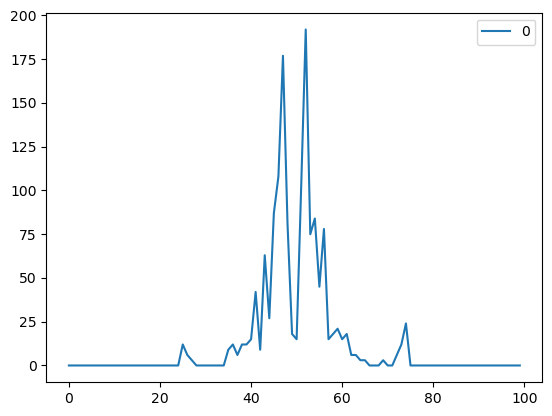

In [ ]:
pd.DataFrame(tr.data_storage[23231717].iloc[0].histogram).plot()

In [ ]:
example_tree = DASHTorsionTree(tree_folder_path="./example_tree_out")

Loading DASH tree data
Loaded 2106 trees and data


In [ ]:
for branch in example_tree.tree_storage:
    if len(example_tree.tree_storage[branch]) > 1:
        print(f"Branch {branch} has {len(example_tree.tree_storage[branch])} nodes")

Branch 56181818 has 169 nodes
Branch 74234423 has 13 nodes
Branch 23222123 has 333 nodes
Branch 44183917 has 78 nodes
Branch 57171718 has 253 nodes
Branch 57222224 has 17 nodes
Branch 56171724 has 11 nodes
Branch 56222324 has 23 nodes
Branch 17744517 has 12 nodes
Branch 22562122 has 9 nodes
Branch 46231718 has 114 nodes
Branch 45234523 has 3 nodes
Branch 67222322 has 12 nodes
Branch 18237417 has 22 nodes
Branch 24237417 has 19 nodes
Branch 57451724 has 10 nodes
Branch 22181812 has 11 nodes
Branch 21222317 has 26 nodes
Branch 23234517 has 397 nodes
Branch 23675623 has 15 nodes
Branch 39181724 has 12 nodes
Branch 21563917 has 29 nodes
Branch 22452217 has 57 nodes
Branch 23224422 has 126 nodes
Branch 23171818 has 14 nodes
Branch 39172323 has 272 nodes
Branch 45234417 has 13 nodes
Branch 45227424 has 8 nodes
Branch 24181818 has 7 nodes
Branch 56232122 has 19 nodes
Branch 45181822 has 28 nodes
Branch 23441723 has 142 nodes
Branch 45441818 has 9 nodes
Branch 24215623 has 9 nodes
Branch 57172

In [ ]:
mol_idx_test = tree_constructor.test_df.mol_index.unique().tolist()

In [ ]:
tree_constructor.df.head()

,atomtype,idx_in_mol,mol_index,node_attentions,truth,h_connectivity,connected_atoms,total_connected_attention,atom_feature
92,C,0,17,"[0.05644359067087934, 0.060629636709162715, 0....",0.002726,-1,"[0, 1, 2, 3]",0.012676,54181819
100,C,0,18,"[0.0445287382155489, 0.04440247451345873, 0.04...",0.000915,-1,"[0, 1, 2, 3]",0.011518,54181819
108,C,0,19,"[0.033775781647200846, 0.03424387531977831, 0....",-0.000515,-1,"[0, 1, 2, 3]",0.013637,54181819
278,C,0,41,"[0.05559352610899962, 0.03428071708137512, 0.1...",-0.003523,-1,"[0, 1, 2, 3, 4]",0.096859,19184512
287,C,0,42,"[0.0400789684491619, 0.03064567868564406, 0.15...",-0.001546,-1,"[0, 1, 2, 3, 4]",0.029138,19184512


In [ ]:
from serenityff.torsion.tree.dash_utils import get_canon_torsion_feature

In [ ]:
mol_i_test = 7000

In [ ]:
af1, af2, af3, af4 = [AtomFeatures.atom_features_from_molecule(mol_supplier[mol_i_test], atom_i) for atom_i in [0,1,2,3]]

In [ ]:
print(af1, af2, af3, af4)

24 56 23 22


In [ ]:
get_canon_torsion_feature(af1, af2, af3, af4)

24562322

In [ ]:
matched_node_path = example_tree.match_new_atom(atom=[0,1,2,3], mol=mol_supplier[mol_i_test])

In [ ]:
matched_node_path

[24562322, 0, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
example_tree.get_atom_properties(matched_node_path=matched_node_path)

level                                                           10
atom_type                                                       18
con_atom                                                        10
con_type                                                         4
max_attention                                             0.018171
size                                                             3
histogram        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 18, dtype: object

In [ ]:
test_mol = mol_supplier[mol_i_test]
drawMol3D(test_mol, size=(400,400))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
def draw_torsion_histogram(node_path, i):
    hist_data = np.array(example_tree.data_storage[node_path[0]].iloc[node_path[i]]["histogram"])
    max_freq = max(hist_data)
    hist_data = hist_data / max_freq
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(np.linspace(-180, 180, len(hist_data)), hist_data, color="C2")
    ax.set_xlim(-180, 180)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Torsion angle (degrees)")
    ax.set_ylabel("Likelihood")
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels(["-180", "-90", "0", "90", "180"])
    # draw grid lines for x = -90, 0, 90
    ax.grid(axis="x", color="black", linestyle="--", linewidth=0.5)
    plt.show()

In [ ]:
node_path = example_tree.match_new_torsion(atoms_in_torsion=[0,1,2,3], mol=test_mol)
print(node_path)

[24562322, 0, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [ ]:
interact(draw_torsion_histogram, node_path=fixed(node_path), i=ipywidgets.IntSlider(min=1, max=len(node_path)-1, step=1, value=1, description="Node"))

interactive(children=(IntSlider(value=1, description='Node', max=10, min=1), Output()), _dom_classes=('widget-…

<function __main__.draw_torsion_histogram(node_path, i)>

In [ ]:
#rmtree(out_folder)